In [1]:
%matplotlib inline
import pandas as pd
import sklearn as skl
import tensorflow as tf
import numpy as np
from pathlib import Path

import datetime
import time

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Run me second

In [2]:
cleaned_df = pd.read_csv('./Resources/ealtman2019/cleaned_columns.csv')
cleaned_df.head()

,User,Card,Year,Month,Day,Time,Amount,Merchant City,Merchant State,Zip,...,Swipe,Asia,Africa,United States,Europe,Oceana,North America,South America,Carribean,Middle East
0,0,0,2002,9,1,06:21,134,La Verne,CA,91750.0,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,2002,9,1,06:42,38,Monterey Park,CA,91754.0,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,2002,9,2,06:22,120,Monterey Park,CA,91754.0,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,2002,9,2,17:45,129,Monterey Park,CA,91754.0,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,2002,9,3,06:23,105,La Verne,CA,91750.0,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# cleaned_df = cleaned_df.fillna(0)

In [4]:
list(cleaned_df.columns)

['User',
 'Card',
 'Year',
 'Month',
 'Day',
 'Time',
 'Amount',
 'Merchant City',
 'Merchant State',
 'Zip',
 'MCC',
 'Errors?',
 'Is Fraud?',
 'Chip',
 'Online',
 'Swipe',
 'Asia',
 'Africa',
 'United States',
 'Europe',
 'Oceana',
 'North America',
 'South America',
 'Carribean',
 'Middle East']

In [5]:
sample_df = cleaned_df.sample(n=100000, random_state = 78)
sample_df.shape

(100000, 25)

In [6]:
cols=["Year","Month","Day", "Time"]

sample_df['Date'] = sample_df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")


In [7]:
sample_df['Date']=pd.to_datetime(sample_df['Date'])

In [8]:
sample_df = sample_df.drop(columns= cols)

In [9]:
sample_df = sample_df.drop(columns= ['Merchant City', 'Merchant State'])

In [10]:
sample_df['Errors?'].nunique()

10

In [11]:
list(sample_df.columns)

['User',
 'Card',
 'Amount',
 'Zip',
 'MCC',
 'Errors?',
 'Is Fraud?',
 'Chip',
 'Online',
 'Swipe',
 'Asia',
 'Africa',
 'United States',
 'Europe',
 'Oceana',
 'North America',
 'South America',
 'Carribean',
 'Middle East',
 'Date']

In [12]:
# sample_df['Date'].head()

In [13]:
sample_df['Date'] = sample_df['Date'].astype(np.int64) // 10**9

In [14]:
sample_df.head()

,User,Card,Amount,Zip,MCC,Errors?,Is Fraud?,Chip,Online,Swipe,Asia,Africa,United States,Europe,Oceana,North America,South America,Carribean,Middle East,Date
12322172,1135,0,21,0.0,7393,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1569685380
2039964,187,1,51,94598.0,5921,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1240682460
5911827,559,2,46,4444.0,5912,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1131818520
8054852,787,3,38,72601.0,7538,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1420295460
21536504,1982,4,6,32967.0,5541,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1555882500


In [15]:
sample_df = pd.get_dummies(sample_df, columns =['Errors?'])

In [16]:
list(sample_df.columns)

['User',
 'Card',
 'Amount',
 'Zip',
 'MCC',
 'Is Fraud?',
 'Chip',
 'Online',
 'Swipe',
 'Asia',
 'Africa',
 'United States',
 'Europe',
 'Oceana',
 'North America',
 'South America',
 'Carribean',
 'Middle East',
 'Date',
 'Errors?_0',
 'Errors?_Bad CVV',
 'Errors?_Bad Card Number',
 'Errors?_Bad Card Number,Insufficient Balance',
 'Errors?_Bad Expiration',
 'Errors?_Bad PIN',
 'Errors?_Bad PIN,Insufficient Balance',
 'Errors?_Bad Zipcode',
 'Errors?_Insufficient Balance',
 'Errors?_Technical Glitch']

In [17]:
sample_df = sample_df.rename(columns={
									    'Errors?_Bad CVV':"Bad CVV",
										 'Errors?_Bad CVV,Insufficient Balance':"Bad CVV,Insufficient Balance",
										 'Errors?_Bad CVV,Technical Glitch':"Bad CVV,Technical Glitch",
										 'Errors?_Bad Card Number':"Bad Card Number",
										 'Errors?_Bad Card Number,Bad CVV':"Bad Card Number,Bad CVV",
										 'Errors?_Bad Card Number,Bad Expiration':"Bad Card Number,Bad Expiration",
										 'Errors?_Bad Card Number,Insufficient Balance':"Bad Card Number,Insufficient Balance",
										 'Errors?_Bad Card Number,Technical Glitch':"Bad Card Number,Technical Glitch",
										 'Errors?_Bad Expiration':"Bad Expiration",
										 'Errors?_Bad Expiration,Bad CVV':"Bad Expiration,Bad CVV",
										 'Errors?_Bad Expiration,Insufficient Balance':"Bad Expiration,Insufficient Balance",
										 'Errors?_Bad PIN':"Bad PIN",
										 'Errors?_Bad PIN,Insufficient Balance':"Bad PIN,Insufficient Balance",
										 'Errors?_Bad PIN,Technical Glitch':"Bad PIN,Technical Glitch",
										 'Errors?_Bad Zipcode':"Bad Zipcode",
										 'Errors?_Insufficient Balance':"Insufficient Balance",
										 'Errors?_Insufficient Balance,Technical Glitch':"Insufficient Balance,Technical Glitch",
										 'Errors?_Technical Glitch':"Technical Glitch"
									  })

In [18]:
list(sample_df.columns)

['User',
 'Card',
 'Amount',
 'Zip',
 'MCC',
 'Is Fraud?',
 'Chip',
 'Online',
 'Swipe',
 'Asia',
 'Africa',
 'United States',
 'Europe',
 'Oceana',
 'North America',
 'South America',
 'Carribean',
 'Middle East',
 'Date',
 'Errors?_0',
 'Bad CVV',
 'Bad Card Number',
 'Bad Card Number,Insufficient Balance',
 'Bad Expiration',
 'Bad PIN',
 'Bad PIN,Insufficient Balance',
 'Bad Zipcode',
 'Insufficient Balance',
 'Technical Glitch']

In [19]:
sample_df = sample_df.drop(columns=['Errors?_0'])

In [20]:
list(sample_df.columns)

['User',
 'Card',
 'Amount',
 'Zip',
 'MCC',
 'Is Fraud?',
 'Chip',
 'Online',
 'Swipe',
 'Asia',
 'Africa',
 'United States',
 'Europe',
 'Oceana',
 'North America',
 'South America',
 'Carribean',
 'Middle East',
 'Date',
 'Bad CVV',
 'Bad Card Number',
 'Bad Card Number,Insufficient Balance',
 'Bad Expiration',
 'Bad PIN',
 'Bad PIN,Insufficient Balance',
 'Bad Zipcode',
 'Insufficient Balance',
 'Technical Glitch']

In [21]:
sample_df.head()

,User,Card,Amount,Zip,MCC,Is Fraud?,Chip,Online,Swipe,Asia,...,Date,Bad CVV,Bad Card Number,"Bad Card Number,Insufficient Balance",Bad Expiration,Bad PIN,"Bad PIN,Insufficient Balance",Bad Zipcode,Insufficient Balance,Technical Glitch
12322172,1135,0,21,0.0,7393,0,0,1,0,0.0,...,1569685380,0,0,0,0,0,0,0,0,0
2039964,187,1,51,94598.0,5921,0,0,0,1,0.0,...,1240682460,0,0,0,0,0,0,0,0,0
5911827,559,2,46,4444.0,5912,0,0,0,1,0.0,...,1131818520,0,0,0,0,0,0,0,0,0
8054852,787,3,38,72601.0,7538,0,1,0,0,0.0,...,1420295460,0,0,0,0,0,0,0,0,0
21536504,1982,4,6,32967.0,5541,0,1,0,0,0.0,...,1555882500,0,0,0,0,0,0,0,0,0


In [22]:
sample_df.dtypes

User                                      int64
Card                                      int64
Amount                                    int64
Zip                                     float64
MCC                                       int64
Is Fraud?                                 int64
Chip                                      int64
Online                                    int64
Swipe                                     int64
Asia                                    float64
Africa                                  float64
United States                           float64
Europe                                  float64
Oceana                                  float64
North America                           float64
South America                           float64
Carribean                               float64
Middle East                             float64
Date                                      int64
Bad CVV                                   uint8
Bad Card Number                         

In [23]:
# Split the data into X_train, X_test, y_train, y_test
y = sample_df["Is Fraud?"].values
X = sample_df.drop("Is Fraud?", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Train a Logistic Regression model print the model score
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9993066666666667
Testing Data Score: 0.99912


In [25]:
tsne = TSNE(learning_rate=50, n_components=3, perplexity=50, verbose=1, n_iter=250)

In [26]:
tsne_features = tsne.fit_transform(sample_df)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.004s...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 100000 samples in 168.514s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional probabilities for sample 13000 / 100000
[t-SNE] Computed conditional probabilities for samp

In [27]:
tsne_features.shape

(100000, 3)

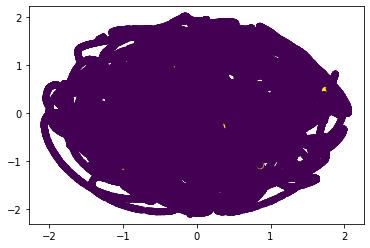

In [35]:
labels = sample_df['Is Fraud?']
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=labels)

In [29]:
# Create an elbow plot to identify the best number of clusters.
inertia = []
k = list(range(1, 11))

# Calculate the inertia
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(sample_df)
    inertia.append(km.inertia_)

    
# 3.2 If possible, determine where the elbow of the plot is, and at which value of k it appears.
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,2.583814e+21
1,2,7.939869e+20
2,3,3.891996e+20
3,4,2.302218e+20
4,5,1.511394e+20


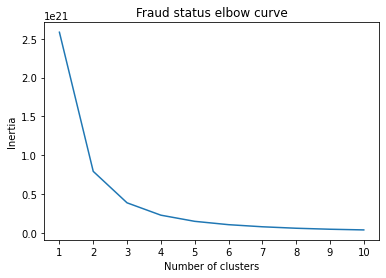

In [30]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Fraud status elbow curve')
plt.show()

In [37]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.99916


[1.71150698e-01 5.06712461e-02 1.26411817e-01 9.82789218e-02
 2.25939440e-01 5.80990309e-03 5.57804690e-03 6.53165220e-03
 3.42034851e-03 9.12454992e-03 5.14416195e-02 4.37726003e-04
 3.53176918e-06 3.87453894e-03 2.73104009e-04 1.35386372e-02
 3.95507064e-03 2.19509607e-01 3.23576884e-05 2.48909727e-05
 2.24519458e-07 8.48987784e-05 4.73037143e-05 1.06613549e-09
 4.15520282e-09 3.29244313e-03 5.67417640e-04]


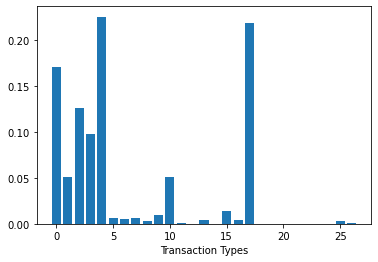

In [46]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.xlabel('Transaction Types')
plt.show()

In [ ]:
# The most relevent features are Merchant Type and User, with the mosdt common area of fraud being the Middle East
# The only relevant error type is Bad Zipcode, which most primarily relates to online or automated transactions
